In [203]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

In [204]:
data= yf.download("NVDA", start="2017-10-10", end="2025-7-29")
data.columns = data.columns.get_level_values(0)

price = data["Close"]  # ✅ Correct for flattened columns


C:\Users\ceiro\AppData\Local\Temp\ipykernel_46712\495797488.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data= yf.download("NVDA", start="2017-10-10", end="2025-7-29")
[*********************100%***********************]  1 of 1 completed


In [205]:
mean = price.rolling(20).mean()
std = price.rolling(20).std()
upper = mean + 2 * std
lower = mean - 2 * std
data['HL'] = data['High'] - data['Low']
data['HC'] = (data['High'] - data['Close'].shift(1)).abs()
data['LC'] = (data['Low'] - data['Close'].shift(1)).abs()
data['TR'] = data[['HL', 'HC', 'LC']].max(axis=1)

data['ATR']=data['TR'].rolling(window=14).mean()

In [206]:
position = signal.shift(1).rolling(window=5).max().fillna(0)

#with pd.option_context('display.max_rows', None):
  #  print(data['ATR'])

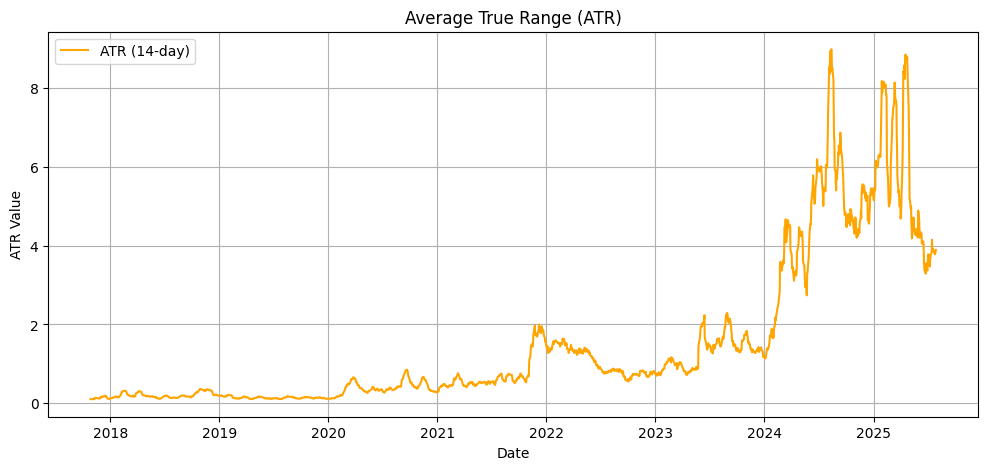

In [207]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(data['ATR'], label='ATR (14-day)', color='orange')
plt.title('Average True Range (ATR)')
plt.xlabel('Date')
plt.ylabel('ATR Value')
plt.grid(True)
plt.legend()
plt.show()


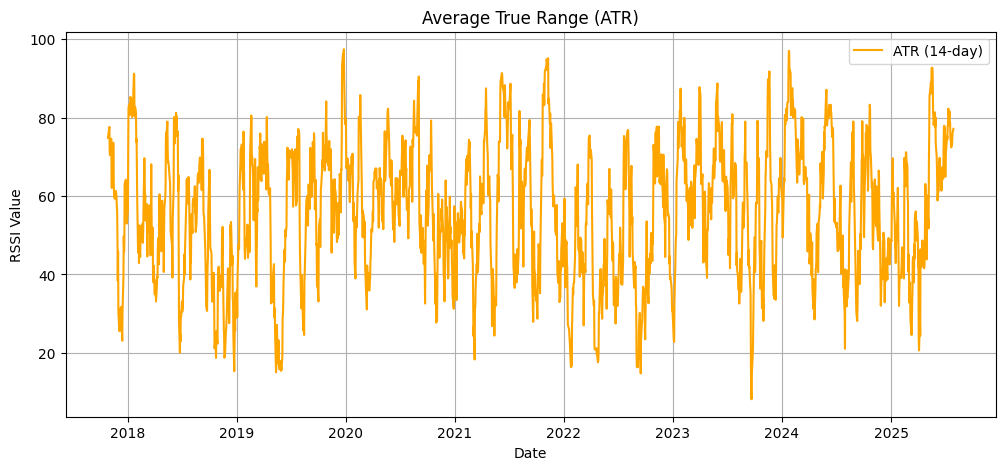

In [208]:
delta=price.diff()
gain=delta.where(delta>0,0)
loss=-delta.where(delta<0,0)
avg_gain=gain.rolling(14).mean()
avg_loss= loss.rolling(14).mean()

rs=avg_gain/avg_loss
rsi=100-(100/(1+rs))
data['RSI']=rsi


plt.figure(figsize=(12, 5))
plt.plot(data['RSI'], label='ATR (14-day)', color='orange')
plt.title('Average True Range (ATR)')
plt.xlabel('Date')
plt.ylabel('RSSI Value')
plt.grid(True)
plt.legend()
plt.show()

In [209]:
range_ = upper - lower
range_aligned, atr_aligned = range_.align(data['ATR'], join='inner')
rsi_aligned = data['RSI'].reindex_like(range_aligned)

# Combined condition: breakout + not overbought
entry_signal = ((range_aligned > 1.5 * atr_aligned) & (rsi_aligned < 70)).astype(int)
exit_signal = (range_aligned < 1.0 * atr_aligned).astype(int)
position = entry_signal.copy()
position[exit_signal == 1] = 0
position = position.ffill().fillna(0)


In [210]:

with pd.option_context('display.max_rows', None):
    print(position)

Date
2017-10-10    0
2017-10-11    0
2017-10-12    0
2017-10-13    0
2017-10-16    0
2017-10-17    0
2017-10-18    0
2017-10-19    0
2017-10-20    0
2017-10-23    0
2017-10-24    0
2017-10-25    0
2017-10-26    0
2017-10-27    0
2017-10-30    0
2017-10-31    0
2017-11-01    0
2017-11-02    0
2017-11-03    0
2017-11-06    0
2017-11-07    0
2017-11-08    1
2017-11-09    1
2017-11-10    0
2017-11-13    1
2017-11-14    0
2017-11-15    1
2017-11-16    1
2017-11-17    1
2017-11-20    1
2017-11-21    1
2017-11-22    1
2017-11-24    1
2017-11-27    1
2017-11-28    1
2017-11-29    1
2017-11-30    1
2017-12-01    1
2017-12-04    1
2017-12-05    1
2017-12-06    1
2017-12-07    1
2017-12-08    1
2017-12-11    1
2017-12-12    1
2017-12-13    1
2017-12-14    1
2017-12-15    1
2017-12-18    1
2017-12-19    1
2017-12-20    1
2017-12-21    1
2017-12-22    1
2017-12-26    1
2017-12-27    1
2017-12-28    1
2017-12-29    1
2018-01-02    1
2018-01-03    0
2018-01-04    0
2018-01-05    0
2018-01-08    0
201

In [211]:


with pd.option_context('display.max_rows', None):
    print(position)

Date
2017-10-10    0
2017-10-11    0
2017-10-12    0
2017-10-13    0
2017-10-16    0
2017-10-17    0
2017-10-18    0
2017-10-19    0
2017-10-20    0
2017-10-23    0
2017-10-24    0
2017-10-25    0
2017-10-26    0
2017-10-27    0
2017-10-30    0
2017-10-31    0
2017-11-01    0
2017-11-02    0
2017-11-03    0
2017-11-06    0
2017-11-07    0
2017-11-08    1
2017-11-09    1
2017-11-10    0
2017-11-13    1
2017-11-14    0
2017-11-15    1
2017-11-16    1
2017-11-17    1
2017-11-20    1
2017-11-21    1
2017-11-22    1
2017-11-24    1
2017-11-27    1
2017-11-28    1
2017-11-29    1
2017-11-30    1
2017-12-01    1
2017-12-04    1
2017-12-05    1
2017-12-06    1
2017-12-07    1
2017-12-08    1
2017-12-11    1
2017-12-12    1
2017-12-13    1
2017-12-14    1
2017-12-15    1
2017-12-18    1
2017-12-19    1
2017-12-20    1
2017-12-21    1
2017-12-22    1
2017-12-26    1
2017-12-27    1
2017-12-28    1
2017-12-29    1
2018-01-02    1
2018-01-03    0
2018-01-04    0
2018-01-05    0
2018-01-08    0
201

In [212]:
print(range_aligned.head(30))
print(atr_aligned.head(20))
print((range_aligned / atr_aligned).head(20))


Date
2017-10-10         NaN
2017-10-11         NaN
2017-10-12         NaN
2017-10-13         NaN
2017-10-16         NaN
2017-10-17         NaN
2017-10-18         NaN
2017-10-19         NaN
2017-10-20         NaN
2017-10-23         NaN
2017-10-24         NaN
2017-10-25         NaN
2017-10-26         NaN
2017-10-27         NaN
2017-10-30         NaN
2017-10-31         NaN
2017-11-01         NaN
2017-11-02         NaN
2017-11-03         NaN
2017-11-06    0.608342
2017-11-07    0.623744
2017-11-08    0.613692
2017-11-09    0.572161
2017-11-10    0.626550
2017-11-13    0.649657
2017-11-14    0.673378
2017-11-15    0.663382
2017-11-16    0.655000
2017-11-17    0.631187
2017-11-20    0.607445
Name: Close, dtype: float64
Date
2017-10-10         NaN
2017-10-11         NaN
2017-10-12         NaN
2017-10-13         NaN
2017-10-16         NaN
2017-10-17         NaN
2017-10-18         NaN
2017-10-19         NaN
2017-10-20         NaN
2017-10-23         NaN
2017-10-24         NaN
2017-10-25         

C:\Users\ceiro\AppData\Local\Temp\ipykernel_46712\2664851803.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  buy_hold=(10000/price[0])*price


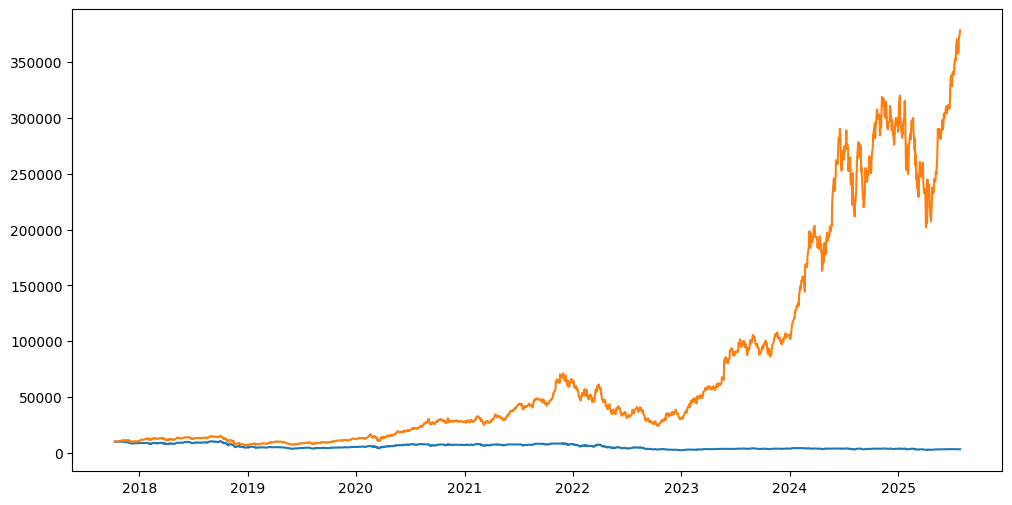

Date
2017-10-10    NaN
2017-10-11    0.0
2017-10-12    0.0
2017-10-13    0.0
2017-10-16    0.0
             ... 
2025-07-22   -0.0
2025-07-23    0.0
2025-07-24    0.0
2025-07-25   -0.0
2025-07-28    0.0
Length: 1959, dtype: float64


In [213]:
daily_returns = data['Close'].pct_change()
strategy_returns = daily_returns * position

buy_hold=(10000/price[0])*price
equity=(1 + strategy_returns).cumprod() * 10000

plt.figure(figsize=(12,6))
plt.plot(equity, label="Volatity strat")
plt.plot(buy_hold, label="buy and hold")
plt.show()
print(strategy_returns)

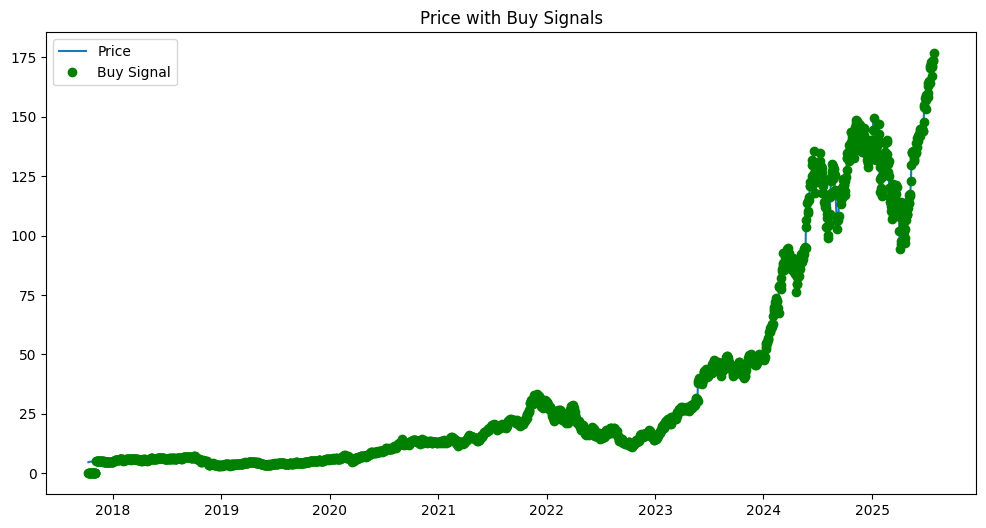

In [214]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(price, label='Price')
plt.plot(signal * price, label='Buy Signal', marker='o', linestyle='', color='green')
plt.legend()
plt.title("Price with Buy Signals")
plt.show()

